In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
df1 = pd.read_csv('/content/gdrive/MyDrive/FPT/MSN.csv')
df1


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0
...,...,...,...,...,...,...,...,...
135349,MSN,12/22/2020 14:23,82.8,82.8,82.8,82.8,700,0
135350,MSN,12/22/2020 14:24,82.7,82.8,82.7,82.8,4660,0
135351,MSN,12/22/2020 14:25,82.8,82.8,82.8,82.8,50,0
135352,MSN,12/22/2020 14:27,82.8,82.8,82.8,82.8,300,0


Phân tích biến động giá cổ phiếu dựa trên giá close cuối ngày

In [3]:
df1 = df1[['Date/Time', 'Close']]


In [4]:
df1['Date/Time'][12]

'12/25/2017 9:40'

In [5]:


def str_to_datetime1(s):
  sp = s.split(' ')[0]
  sp1 = s.split(' ')[1]

  split = sp.split('/')
  split1 = sp1.split(':')
 
  year, month, day,hour,minute = int(split[2]), int(split[0]), int(split[1]), int(split1[0]), int(split1[1])
  return datetime.datetime(year=year, month=month, day=day,hour=hour,minute=minute)

datetime_object1 = str_to_datetime1('12/25/2018 9:15')
datetime_object1, type(datetime_object1)

(datetime.datetime(2018, 12, 25, 9, 15), datetime.datetime)

In [6]:
df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime1)
df1['Date/Time']

<ipython-input-6-1c30a0f8f3cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date/Time'] = df1['Date/Time'].apply(str_to_datetime1)


0        2017-12-25 09:15:00
1        2017-12-25 09:16:00
2        2017-12-25 09:18:00
3        2017-12-25 09:20:00
4        2017-12-25 09:21:00
                 ...        
135349   2020-12-22 14:23:00
135350   2020-12-22 14:24:00
135351   2020-12-22 14:25:00
135352   2020-12-22 14:27:00
135353   2020-12-22 14:46:00
Name: Date/Time, Length: 135354, dtype: datetime64[ns]

In [7]:
df1.index = df1.pop('Date/Time')


In [8]:
import numpy as np
import time
from dateutil.relativedelta import relativedelta
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime1(first_date_str)
  last_date  = str_to_datetime1(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    # print(len(df_subset))
    assert len(df_subset) == n+1
 

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]
    # print(x,y)
    dates.append(target_date)
    X.append(x)
    Y.append(y)
    
    next = dataframe.loc[target_date:target_date+datetime.timedelta(hours=1,days=1)+relativedelta(years=1)]
    # print("next_week",next_week)
    next_datetime_str = str(next.head(2).tail(1).index.values[0])
    # print("next_datetime_str",next_week.head(2),"|",next_week.head(2).tail(1),"|",next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    next_hour_str = next_datetime_str.split('T')[1]
    # print("next_hour_str",next_hour_str)
    # print("next_date_str",next_date_str)
    hour_minute= next_hour_str.split(':')
    year_month_day = next_date_str.split('-')
    hour,minute,sc= hour_minute
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year),hour=int(hour),minute=int(minute))
    # print(next_date)
    if last_time:
      break
    # time.sleep(0.1)
    target_date = next_date
    
    if target_date == last_date:
      last_time = True
    # time.sleep(0.001)
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

windowed_df = df_to_windowed_df(df1, 
                                '12/25/2017 9:40', 
                                '12/22/2020 14:46', 
                                n=10)
windowed_df

,Target Date,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2017-12-25 09:40:00,73.5,73.1,73.0,73.1,73.1,73.3,73.5,73.3,73.1,73.1,73.1
1,2017-12-25 09:41:00,73.1,73.0,73.1,73.1,73.3,73.5,73.3,73.1,73.1,73.1,73.3
2,2017-12-25 09:42:00,73.0,73.1,73.1,73.3,73.5,73.3,73.1,73.1,73.1,73.3,73.3
3,2017-12-25 09:46:00,73.1,73.1,73.3,73.5,73.3,73.1,73.1,73.1,73.3,73.3,73.3
4,2017-12-25 09:48:00,73.1,73.3,73.5,73.3,73.1,73.1,73.1,73.3,73.3,73.3,73.2
...,...,...,...,...,...,...,...,...,...,...,...,...
135337,2020-12-22 14:23:00,82.7,82.7,82.7,82.7,82.7,82.7,82.9,82.7,82.8,82.8,82.8
135338,2020-12-22 14:24:00,82.7,82.7,82.7,82.7,82.7,82.9,82.7,82.8,82.8,82.8,82.8
135339,2020-12-22 14:25:00,82.7,82.7,82.7,82.7,82.9,82.7,82.8,82.8,82.8,82.8,82.8
135340,2020-12-22 14:27:00,82.7,82.7,82.7,82.9,82.7,82.8,82.8,82.8,82.8,82.8,82.8


In [9]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()
  
  dates = df_as_np[:,0]
 
  middle_matrix = df_as_np[:, 1:-1]

  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))
  
  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((135342,), (135342, 10, 1), (135342,))

In [10]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)
q_80, q_90, int(len(dates))

(108273, 121807, 135342)

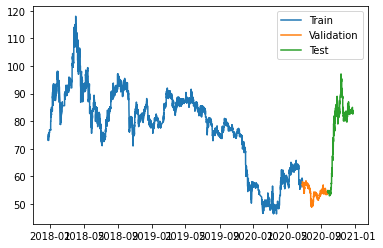

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Mô hình xử lý dữ liệu đầu vào có hình dáng [batch,sequence length, features], sequence length chính là số lượng time steps trong 1 mẫu và features là số lượng thành phần mà model dự đoán, nếu chỉ dự đoán giá thì feature sẽ luôn là 1

với hình bên dưới thì chỉ là 1 khối encoder của transformer. Tuy nhiên thì khối embedded được thay thế bằng LayerNormalization ( với nhiều bài báo thì sử dụng BatchNormalization với những layer sẽ tốt hơn nhưng trong trường hợp này thì không ) " The positional embedding " khối này có cũng được mà không có cũng ko ảnh hưởng đến tính chính xác của model, "The multi-head attention" thì vấn được thực hiện như bình thường, tiếp theo đó chính là "feed forward" chúng ta sẽ sử dụng conv1D( vì nó cho ra kết quả tốt ) ngoài ra thì vẫn có thể sử dụng các layer như LSTM, dense,...  

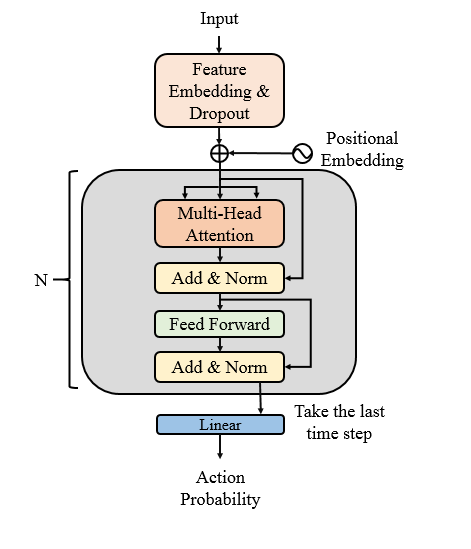







In [12]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN,Conv1D,GRU,MaxPooling1D,Bidirectional
from keras.layers import Dropout
from tensorflow.keras import layers

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    
    
    # "eMBEDDING layerr
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    
    # ATTENTION 
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs
    
    # FEED FORWARD  
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation = "elu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res




 Hàm "transformer_encoder" này nhận các đối số sau:



1.   inputs: tensor đầu vào cho khối mã hóa
2.   head_size: một số nguyên đại diện cho kích thước của mỗi attention head bên trong lớp multi-head attention 

1.   num_heads: một số nguyên đại diện cho số lượng attention heads được sử dụng trong lớp multi-head attention
2.   ff_dim: một số nguyên đại diện cho số lượng bộ lọc trong lớp feedforward

1.   dropout: tỷ lệ dropout được sử dụng trong khối mã hóa

đầu tiên thực hiện chuẩn hóa lớp cho tensor đầu vào (LayerNormalization). Sau đó, nó áp dụng multi-head attention với num_heads và head_size là đại lượng chính cho tensor đầu vào được chuẩn hóa. Một lớp dropout được áp dụng sau lớp multi-head attention. Kết quả sau đó được cộng lại với tensor đầu vào ban đầu bằng residual connections.

Tiếp theo, một lớp normalization thứ hai được áp dụng cho đầu ra của kết nối dư. Một lớp tích chập 1D với ff_dim bộ lọc và kích thước kernel là 1 được áp dụng cho đầu ra kết nối dư đã được chuẩn hóa. Một lớp dropout được áp dụng sau lớp tích chập và một lớp Conv1D() khác được áp dụng với kích thước kernel là 1 và cùng số lượng bộ lọc như tensor đầu vào. Đầu ra của Conv1D() được cộng lại với đầu ra của lớp chuẩn hóa đầu tiên bằng một kết nối dư khác.

Hàm trả về tensor đầu ra cuối cùng sau khi áp dụng kết nối dư thứ hai.

Sau các vòng lặp khối transformer_encoder, một lớp GlobalAveragePooling1D() được áp dụng cho tensor đầu ra. sau đó được truyền qua một chuỗi các lớp fully connected với mlp_units là [256] cuối cùng là lớp dense với 1 đầy ra và sử dụng hàm acivation là linear được áp dụng để cho ra đầu ra cuối cùng

In [13]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout,
    mlp_dropout=0):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    
    for _ in range(num_transformer_blocks): 
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout) # tiếp đó cho khối " transformer_encoder " lặp lại 5 lần ( xếp các trồng các khối )

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)  # tiếp đó giống với  cnn sử dụng pooling để giảm dimension đầu ra của chúng thì với transformer
    for dim in mlp_units:                                                # ta cũng làm tương tự như vậy tuy nhiên pooling layer chúng ta sử dụng là hàm GlobalAveragePooling1D()
        x = layers.Dense(dim, activation="elu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(1, activation="linear")(x)
    return keras.Model(inputs, outputs)

    


In [16]:
def lr_scheduler(epoch, lr, warmup_epochs=30, decay_epochs=100, initial_lr=1e-6, base_lr=1e-3, min_lr=5e-5):
    if epoch <= warmup_epochs:
        pct = epoch / warmup_epochs
        return ((base_lr - initial_lr) * pct) + initial_lr

    if epoch > warmup_epochs and epoch < warmup_epochs+decay_epochs:
        pct = 1 - ((epoch - warmup_epochs) / decay_epochs)
        return ((base_lr - min_lr) * pct) + min_lr

    return min_lr
checkpoint_path="/content/gdrive/MyDrive/FPT/tensorflow/MSN.h5"
callbacks = [
            keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,monitor='val_loss',
                                                  mode='min',
                                                  save_best_only=True),
            keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
            keras.callbacks.LearningRateScheduler(lr_scheduler)
            ]
input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=46, 
    num_heads=60, 
    ff_dim=105, 
    num_transformer_blocks=5, 
    mlp_units=[256],
    mlp_dropout=0.1,
    dropout=0.1,
)
print(model)
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["mean_squared_error"],
)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 10, 1)       2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 10, 1)       19321       ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

In [17]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=100,
    callbacks=callbacks,
)

Epoch 1/100
867/867 [==============================] - ETA: 0s - loss: 7140.7563 - mean_squared_error: 7140.7563
Epoch 1: val_loss improved from inf to 2795.41797, saving model to /content/gdrive/MyDrive/FPT/tensorflow/MSN.h5
867/867 [==============================] - 78s 56ms/step - loss: 7140.7563 - mean_squared_error: 7140.7563 - val_loss: 2795.4180 - val_mean_squared_error: 2795.4180 - lr: 1.0000e-06
Epoch 2/100
866/867 [============================>.] - ETA: 0s - loss: 580.2030 - mean_squared_error: 580.2030
Epoch 2: val_loss improved from 2795.41797 to 12.73485, saving model to /content/gdrive/MyDrive/FPT/tensorflow/MSN.h5
867/867 [==============================] - 42s 49ms/step - loss: 580.0992 - mean_squared_error: 580.0992 - val_loss: 12.7349 - val_mean_squared_error: 12.7349 - lr: 3.4300e-05
Epoch 3/100
866/867 [============================>.] - ETA: 0s - loss: 75.3047 - mean_squared_error: 75.3047
Epoch 3: val_loss improved from 12.73485 to 0.97514, saving model to /content/

423/423 [==============================] - 3s 6ms/step


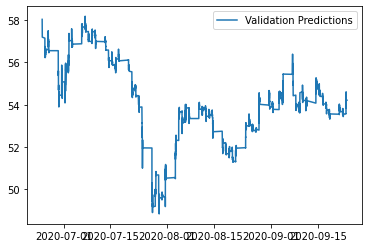

In [26]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.legend(['Validation Predictions'])

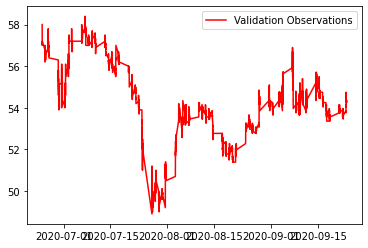

In [25]:
plt.plot(dates_val, y_val,'r')
plt.legend([ 'Validation Observations'])

423/423 [==============================] - 3s 6ms/step


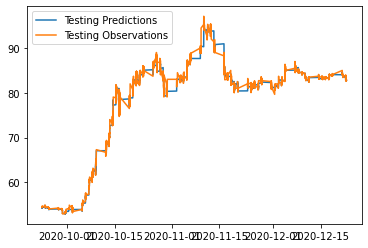

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])